# Dataset Exploring and Visulaization

In [2]:
import sys
!{sys.executable} -m pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from pandas import DataFrame, Series
%matplotlib inline



Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_json('train.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [4]:
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [5]:
df.shape

(39774, 3)

In [6]:
df.groupby('cuisine').size()

cuisine
brazilian        467
british          804
cajun_creole    1546
chinese         2673
filipino         755
french          2646
greek           1175
indian          3003
irish            667
italian         7838
jamaican         526
japanese        1423
korean           830
mexican         6438
moroccan         821
russian          489
southern_us     4320
spanish          989
thai            1539
vietnamese       825
dtype: int64

In [7]:
df.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [8]:
df2 = df[df.applymap(lambda x: x[0] if isinstance(x, list) else x).duplicated()]
df2.sum()

id             0.0
cuisine        0.0
ingredients    0.0
dtype: float64

In [9]:
df.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [10]:
df['cuisine'].value_counts(normalize=True) *100

italian         19.706341
mexican         16.186453
southern_us     10.861367
indian           7.550158
chinese          6.720471
french           6.652587
cajun_creole     3.886961
thai             3.869362
japanese         3.577714
greek            2.954191
spanish          2.486549
korean           2.086790
vietnamese       2.074219
moroccan         2.064163
british          2.021421
filipino         1.898225
irish            1.676975
jamaican         1.322472
russian          1.229446
brazilian        1.174134
Name: cuisine, dtype: float64

In [11]:
# Number of recipes per cuisine
totalCount = df['cuisine'].value_counts()
totalCount

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

Text(0.5, 1.0, 'Total Number of recipes per cuisine')

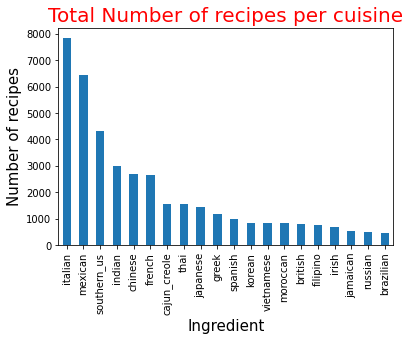

In [12]:
#Plot Bar Graph
plt = totalCount.plot(kind='bar', rot=90 , fontsize=10)
plt.set_xlabel('Ingredient', fontsize=15)
plt.set_ylabel('Number of recipes', fontsize=15)
plt.set_title('Total Number of recipes per cuisine', fontsize=20, color='red')

In [13]:
# Top 10 most occurring ingredients
def get_ingredients(data):
    all_ingredients = []
    for i in range(len(data)):
        if isinstance(data, pd.core.frame.DataFrame):
            all_ingredients.extend(data.loc[i, 'ingredients'])
        else:
            all_ingredients.extend(data.iloc[i])
    return Series(all_ingredients)


Text(0.5, 1.0, 'Most common ingredients')

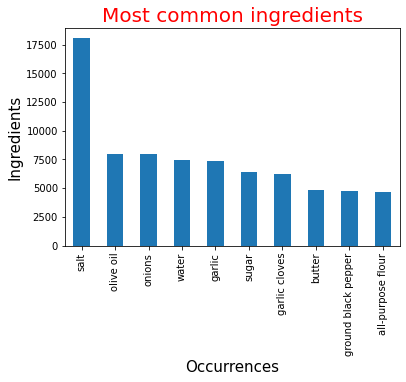

In [14]:
ingredients = get_ingredients(df["ingredients"])
plt = ingredients.value_counts()[:10].plot(kind='bar', rot=90,fontsize=10)
plt.set_xlabel('Occurrences', fontsize=15)
plt.set_ylabel('Ingredients', fontsize=15)
plt.set_title('Most common ingredients', fontsize=20 , color='red')


In [15]:
# Group all ingredients by cuisine
groupbyCuisine = df.groupby('cuisine')['ingredients'].sum()
groupbyCuisine

cuisine
brazilian       [ice cubes, club soda, white rum, lime, turbin...
british         [greek yogurt, lemon curd, confectioners sugar...
cajun_creole    [herbs, lemon juice, fresh tomatoes, paprika, ...
chinese         [low sodium soy sauce, fresh ginger, dry musta...
filipino        [eggs, pepper, salt, mayonaise, cooking oil, g...
french          [sugar, salt, fennel bulb, water, lemon olive ...
greek           [romaine lettuce, black olives, grape tomatoes...
indian          [water, vegetable oil, wheat, salt, black pepp...
irish           [cooking spray, salt, black pepper, yukon gold...
italian         [sugar, pistachio nuts, white almond bark, flo...
jamaican        [plain flour, sugar, butter, eggs, fresh ginge...
japanese        [sirloin, mirin, yellow onion, low sodium soy ...
korean          [jasmine rice, garlic, scallions, sugar, shiit...
mexican         [olive oil, purple onion, fresh pineapple, por...
moroccan        [ground cloves, whole nutmegs, ground ginger, ...
ru

In [16]:
#Count the number of times each ingredient appears in each cuisine
def frequencyItems(group):
    return dict(Series(group).value_counts())

frequency = groupbyCuisine.apply(frequencyItems)
frequency

cuisine
brazilian       {'salt': 194, 'onions': 133, 'olive oil': 118,...
british         {'salt': 407, 'all-purpose flour': 238, 'butte...
cajun_creole    {'salt': 743, 'onions': 529, 'garlic': 370, 'g...
chinese         {'soy sauce': 1363, 'sesame oil': 915, 'salt':...
filipino        {'salt': 421, 'garlic': 325, 'water': 310, 'on...
french          {'salt': 1203, 'sugar': 637, 'all-purpose flou...
greek           {'salt': 572, 'olive oil': 504, 'dried oregano...
indian          {'salt': 1934, 'onions': 1195, 'garam masala':...
irish           {'salt': 376, 'butter': 219, 'all-purpose flou...
italian         {'salt': 3454, 'olive oil': 3111, 'garlic clov...
jamaican        {'salt': 332, 'onions': 173, 'water': 153, 'ga...
japanese        {'soy sauce': 561, 'salt': 422, 'mirin': 402, ...
korean          {'soy sauce': 427, 'sesame oil': 403, 'garlic'...
mexican         {'salt': 2720, 'onions': 1493, 'ground cumin':...
moroccan        {'salt': 413, 'olive oil': 412, 'ground cumin'...
ru

In [17]:
# Get unique ingredients by cuisine
def removeDuplicatesItems(value):
    return list(set(value))

uniqueItems = groupbyCuisine.apply(removeDuplicatesItems)
uniqueItems

cuisine
brazilian       [tilapia, frozen strawberries, whole cloves, a...
british         [tilapia, fillet steaks, green leaf lettuce, e...
cajun_creole    [tilapia, roast breast of chicken, bacon dripp...
chinese         [tilapia, bean curd skins, dipping sauces, dic...
filipino        [tamari soy sauce, tilapia, apple cider, bacon...
french          [sliced pears, roast breast of chicken, frankf...
greek           [filo, green leaf lettuce, whole cloves, pitte...
indian          [dipping sauces, diced green chilies, grained,...
irish           [apple cider, bacon drippings, sesame oil, who...
italian         [tilapia, roast breast of chicken, cheese stic...
jamaican        [tamari soy sauce, green leaf lettuce, sesame ...
japanese        [tilapia, dipping sauces, yoghurt, chili bean ...
korean          [tamari soy sauce, green leaf lettuce, apple c...
mexican         [tilapia, roast breast of chicken, ground coff...
moroccan        [whole cloves, pitted black olives, dipping sa...
ru

Text(0.5, 1.0, 'Unique ingredients by cuisine')

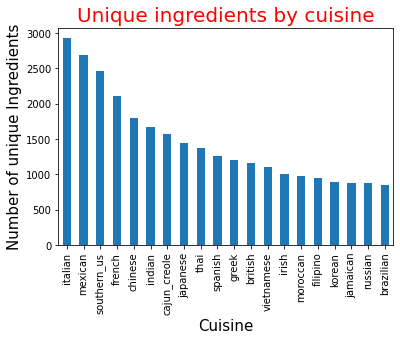

In [18]:
# Number of unique ingredients used by cuisine
x = uniqueItems.apply(len).sort_values(ascending=False)
plt = x.plot(kind='bar', rot=90, fontsize=10)
plt.set_xlabel('Cuisine', fontsize=15)
plt.set_ylabel('Number of unique Ingredients', fontsize=15)
plt.set_title('Unique ingredients by cuisine', fontsize=20 , color='red')

In [19]:
#Unique ingredients in the dataset
unique_ingredients = Series(get_ingredients(uniqueItems).unique())
count= len(unique_ingredients)
print('Total Unique ingredients =', count)

Total Unique ingredients = 6714


# Data Cleaning

In [20]:
#Make dummy of dataset
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
temp = DataFrame(mlb.fit_transform(df['ingredients']), columns=mlb.classes_, index=df.index)
temp.shape

(39774, 6714)

In [21]:
temp.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Join Original and Dummfied
df2 = df.iloc[:].reindex(['cuisine', 'id'], axis=1)
df_new = df2.join(temp)

df_new.shape

(39774, 6716)

In [23]:
df_new.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,10259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,20130,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,22213,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Create a variable for recipe size 
df_new.insert(2, 'size_recipe', df_new.iloc[:, 2:].sum(axis=1))

df_new.shape

(39774, 6717)

In [25]:
df_new.head()

,cuisine,id,size_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,10259,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,25693,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,20130,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,22213,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,13162,20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Partition the data in train and test sets
from sklearn.model_selection import train_test_split

t_size=0.2
seed=7
train, test = train_test_split(df_new, test_size=t_size, random_state=seed) #random_state = set.seed

print("Train dataset = " , len(train)) 
print("Test dataset = " , len(test))

In [1]:
train.head()

NameError: name 'train' is not defined

In [ ]:
#reset index of train dataset
train.reset_index(inplace=True,drop=True)
train.shape

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
#reset index of test dataset
test.reset_index(inplace=True , drop=True)
test.shape

In [ ]:
test.head()

In [ ]:
# Creates a DataFrame in the original format for train set to be manipulated
train_idx = train.index
df_train = df.loc[train_idx].reset_index(drop=True)

if (df_train.columns).contains('size_recipe'):
    df_train.head()
    df_train.shape
else:
    df_train.insert(2, 'size_recipe', df_train['ingredients'].apply(len))
    df_train.head()
    df_train.shape

In [ ]:
df_train.head()

In [ ]:
# Number of recipes per cuisine
number_recipe_cuisine = df_train['cuisine'].value_counts()
number_recipe_cuisine

In [ ]:
count = number_recipe_cuisine.sum()
print("Total number of Recipes = ", count)
total = len(number_recipe_cuisine)
print("Total cuisines = ", total)

In [ ]:
# Top 10 most occurring ingredients
all_ingredients = get_ingredients(df_train)
all_ingredients.value_counts()[:10]

In [ ]:
#Number of unique ingredients
number = len(set(all_ingredients))
print('Number of Unique Ingredients = ' , number)

In [ ]:
# Group all ingredients by cuisine
all_ingredients_cuisine = df_train.groupby('cuisine')['ingredients'].sum()
all_ingredients_cuisine

In [ ]:
cuisine_count = all_ingredients_cuisine.apply(frequencyItems)
cuisine_count

In [ ]:
unique_ingredients_cuisine = all_ingredients_cuisine.apply(removeDuplicatesItems)
unique_ingredients_cuisine

In [ ]:
# Lists number of unique ingredients per cuisine
unique_ingredients_cuisine.apply(len).sort_values(ascending=False)

In [ ]:
# Get unique ingredients
unique_ingredients = get_ingredients(unique_ingredients_cuisine).unique()
number = len(unique_ingredients)
print("Unique ingredients = " , number)

In [ ]:
def check_for_ingredient(my_dict, ingredient):
    result = {}
    for cuisine, list_ingredients in my_dict.items():
        if ingredient in list_ingredients:
            result[cuisine] = list_ingredients[ingredient]
    return result

In [ ]:
# Number of times each ingredient appear in a cuisine
def number_cuisine_per_ingredient(unique):
    cuisines_count_per_ingredient = dict()
    for ingredient in unique:
        cuisines_count_per_ingredient[ingredient] = check_for_ingredient(cuisine_count, ingredient)
    return Series(cuisines_count_per_ingredient)
        
cuisines_count_per_ingredient = number_cuisine_per_ingredient(unique_ingredients)

cuisines_count_per_ingredient.head()

In [ ]:
# Extract cuisines from a dict
def extract_cuisine(my_series):
    return list(my_series.keys())

In [ ]:
cuisines_per_ingredient = cuisines_count_per_ingredient.apply(extract_cuisine)
cuisines_per_ingredient[:10]

In [ ]:
def get_common_ingredients(data):
    common = set(data.loc[data.index[0]])
    for cuisine in data.index[1:]:
        next_cuisine = set(data.loc[cuisine])
        common.intersection_update(next_cuisine)
    return list(common)

In [ ]:
common_ingredients = get_common_ingredients(unique_ingredients_cuisine)
common_ingredients[:10]

In [ ]:
number = len(common_ingredients)
print("Common ingredients = " , number)

In [ ]:
#Remove ingredients from a list of ingredients
def remove_ingredients(series, remove):
    return list(set(series) - set(remove))

In [ ]:
unique_ingredients_cuisine = unique_ingredients_cuisine.apply(remove_ingredients, remove=common_ingredients)
unique_ingredients_cuisine.apply(len).sort_values(ascending=False)

In [ ]:
#Removes common ingredientes of the list all observation of all ingredients used in all recipes
all_ingredients = all_ingredients[~all_ingredients.isin(Series(common_ingredients))]
all_ingredients.reset_index(drop=True, inplace=True)
all_ingredients.value_counts()[:20]

In [ ]:
# Number of unique ingredients after removing common ingredients
count = len(set(all_ingredients))
print("Unique ingredients = ", count)

#  DataFrame Manipulation

In [ ]:
df_train.head()

In [ ]:
# Remove ingredients and zero ingredient recipes from a table
def remove_ingredients_from_table(df, ingredients_to_remove):
    new_df = df.copy()
    # Removes common ingredients from DataFrame
    new_df.loc[:, 'ingredients'] = new_df.loc[:, 'ingredients'].apply(remove_ingredients, remove=ingredients_to_remove)
    new_df.loc[:, 'size_recipe'] = new_df.loc[:, 'ingredients'].apply(len)
    
    if any(new_df['size_recipe'] == 0):     # Checks for zero ingredient recipes to remove
        new_df = new_df[new_df['size_recipe'] != 0]        # Removes zero ingredient recipes from DataFrame
        new_df.reset_index(drop=True, inplace=True)

    return new_df

In [ ]:
df_train = remove_ingredients_from_table(df_train, common_ingredients)
df_train.head()

In [ ]:
df_train.shape

In [ ]:
# Method to remove ingredients and zero ingredient recipes
def remove_ingredients_from_table_dummified(df, ingredients_to_remove, drop_rows=True):
    # Remove ingredients from columns
    df = df.loc[:, ~df.columns.isin(ingredients_to_remove)]
    df.loc[:, 'size_recipe'] = df.iloc[:, 4:].sum(axis=1)     # Update size_recipe

    # Remove zero ingredient recipes left after removing common ingredients
    if drop_rows:
        df = df[df['size_recipe'] != 0]
        return df
    else:
        return df

In [ ]:
df_train_new = remove_ingredients_from_table_dummified(df_new, common_ingredients)
df_train_new.head()

In [ ]:
df_train_new.shape

In [ ]:
# Updates variables after removal of common ingredients from dataset
# Number of recipes per cuisine
number_recipe_cuisine = df_train['cuisine'].value_counts()
number_recipe_cuisine[:10]

In [ ]:
all_ingredients = get_ingredients(df_train)
all_ingredients.value_counts()[:10]

In [ ]:
# Group all ingredients by cuisine after removing common ingredients
all_ingredients_cuisine = df_train.groupby('cuisine')['ingredients'].sum()
all_ingredients_cuisine

In [ ]:
all_ingredient_by_cuisine_count = all_ingredients_cuisine.apply(frequencyItems)
all_ingredient_by_cuisine_count

In [ ]:
unique_ingredients_cuisine = all_ingredients_cuisine.apply(removeDuplicatesItems)
unique_ingredients_cuisine

In [ ]:
# Lists number of unique ingredients per cuisine
unique_ingredients_cuisine.apply(len).sort_values(ascending=False)

In [ ]:
# Get unique ingredients
unique_ingredients = Series(get_ingredients(unique_ingredients_cuisine).unique())
unique_ingredients[:10]

In [ ]:
number = len(unique_ingredients)
print('Number of Unique ingredients after removing common ingredients = ' , number)

In [ ]:
# Number of cuisines each ingredient appears after removing common ingredients
cuisines_count_per_ingredient = number_cuisine_per_ingredient(unique_ingredients)
cuisines_count_per_ingredient[:20]

In [ ]:
# Cuisines in which each ingredient appears
cuisines_per_ingredient = cuisines_count_per_ingredient.apply(extract_cuisine)
cuisines_per_ingredient[:10]

In [ ]:
#  Top 10 ingredients per cuisine after removing common ingredients
top10 = Series()

for cuisine, list_ingredients in all_ingredient_by_cuisine_count.items():
    top10.loc[cuisine] = []
    for ingredient, occurrence in Series(list_ingredients)[:10].items():
        top10.loc[cuisine].append(ingredient)


df_top10 = DataFrame.from_items(zip(top10.index, top10.values)).T
df_top10.columns = ['top{}'.format(i) for i in range(1, 11)]
df_top10

In [ ]:
# Finds the cuisines with same name ingredients 
all_ingredients_same_name_cuisine = Series()

for cuisine, list_ingredients in all_ingredients_cuisine.items():
    all_ingredients_same_name_cuisine.loc[cuisine] = all_ingredients_same_name_cuisine.get(cuisine, [])
    for ingredient in list_ingredients:
        if cuisine in ingredient:
            all_ingredients_same_name_cuisine.loc[cuisine].append(ingredient)
            
all_ingredients_same_name_cuisine

In [ ]:
# Counts the number of recipes(occurrences) in which same cuisine/ingredients name appear
all_ingredients_same_name_cuisine.apply(len)

In [ ]:
# Number of recipes with same name ingredient
all_ingredients_same_name_cuisine.apply(len).sum(axis=0)

In [ ]:
all_ingredients_same_name_cuisine_count = all_ingredients_same_name_cuisine.apply(frequencyItems)
all_ingredients_same_name_cuisine_count

In [ ]:
#Lists of unique cuisine/ingredients names
unique_ingredients_same_name_cuisine = all_ingredients_same_name_cuisine.apply(removeDuplicatesItems)
unique_ingredients_same_name_cuisine

In [ ]:
# Number of unique ingredients per cuisine
unique_ingredients_same_name_cuisine.apply(len)

In [ ]:
# Total occurrences of same cuisine/ingredient name
sum = all_ingredients_same_name_cuisine_count.apply(len).sum()
print('Number of Instances of same cuisine name = ' , sum)

In [ ]:
# Get unique same name ingredients
unique_same_name_ingredients = Series(get_ingredients(unique_ingredients_same_name_cuisine).unique())
%store unique_same_name_ingredients

unique_same_name_ingredients[:10]

In [ ]:
number = len(unique_same_name_ingredients)
print('Number of Unique_ingredients = ' , number)

In [ ]:
# Number of times each same name ingredient appear in a cuisine
cuisines_count_per_same_name_ingredient = number_cuisine_per_ingredient(unique_same_name_ingredients)
cuisines_count_per_same_name_ingredient[:10]

In [ ]:
# Checks in how many other cuisines the same name cuisine-ingredients appear
# Get name of cuisine from dictionary with frequency in which they appear
cuisines_per_same_name_ingredient = cuisines_count_per_same_name_ingredient.apply(extract_cuisine)
cuisines_per_same_name_ingredient[:10]

In [ ]:
# Number of cuisine each same name cuisine appears (first 10 ingredients)
cuisines_per_same_name_ingredient.apply(len)[:10]

# Data Modeling

In [ ]:
df_train['all_ingredients'] = df_train['ingredients'].map(";".join)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df_train['all_ingredients'].values)
X.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(df_train.cuisine)
y[:100]

# KNN

In [ ]:
#KNN
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("KNN Accuracy: ",accuracy_score(y_test, predictions))

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions))

In [ ]:
print('Classification Report: \n',classification_report(y_test, predictions))

In [ ]:
# Trying results on different k values
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(12, 8))
        # X-axis, Y-asix
plt.plot(range(1, 40), error_rate, color="blue", linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("KNN Accuracy: ",accuracy_score(y_test, predictions))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("KNN Accuracy: ",accuracy_score(y_test, predictions))

# Logistic Regression

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic.fit(X_train, y_train)
pred = logistic.predict(X_test)

In [ ]:
print('Logistic Regression Accuracy: ', accuracy_score(pred, y_test))

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test, pred))

In [ ]:
print('Classification Report: \n',classification_report(y_test, pred))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("RandomForest Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))

In [ ]:
print('Classification Report: \n',classification_report(y_test, y_pred))

# Desicion Tree

In [ ]:
#Dexision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, RepeatedKFold, train_test_split
Gini = DecisionTreeClassifier( criterion='gini' )


In [ ]:
#Classifier without pruning using gini
CV = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state = 1)

CV2 = StratifiedShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

Acc_n_Std = cross_val_score(Gini, X, y, scoring='accuracy', cv=CV, n_jobs = -1)
print('Accuracy: ', np.mean(Acc_n_Std), ' Standard Deviation: ', np.std(Acc_n_Std))

Acc_n_Std = cross_val_score(Gini, X, y, scoring='accuracy', cv=CV2, n_jobs = -1)
print('Accuracy: ', np.mean(Acc_n_Std), ' Standard Deviation: ', np.std(Acc_n_Std))